## _30 Days Python Bootcamp @ BEST-ENLIST_

### _Author: SANDHYA S_

### _Date: 07 July '21_

## _Task: Python tkinter_
---

### _1.	Create a browse option with a specific folder which has all the JPEG Files & create a Convert button to convert the image from JPEG to PNG – Basic Image converter App_

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image

def importJPG():
    global image
    import_file_path = filedialog.askopenfilename()
    image = Image.open(import_file_path)

def convertToPNG():
    global image
    export_file_path = filedialog.asksaveasfilename(defaultextension='.png')
    image.save(export_file_path)
    
root = tk.Tk()
root.title("JPG to PNG Converter")
canvas = tk.Canvas(root, width=300, height=300, bg='pink', relief='raised')
canvas.pack()

label = tk.Label(root, text='Image Converter', bg='pink')
label.config(font=('Book Antiqua', 20))
canvas.create_window(150, 40, window=label)


browseJPG = tk.Button(text="Import JPG File", command=importJPG, bg='black', fg='white',
                             font=('Book Antiqua', 12, 'bold'))
canvas.create_window(150, 120, window=browseJPG)
    

savePNG = tk.Button(text='Convert JPG to PNG', command=convertToPNG, bg='black', fg='white',
                             font=('Book Antiqua', 12, 'bold'))
canvas.create_window(150, 200, window=savePNG)

root.mainloop()

#### tkinter window:

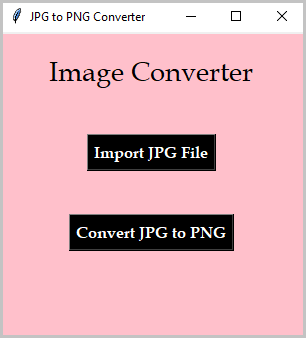

In [2]:
from IPython import display
display.Image('imageConverter.png')

### _2. Create another button as ‘fetch button’ and have a functionality of fetching the weather on a given location in text box_

In [3]:
from tkinter import *
import tkinter as tk
from datetime import datetime
import requests
from tkinter import messagebox


class Weather():
    def weather_report(self):
        self.url = "http://api.openweathermap.org/data/2.5/weather?q="
        self.cityname = self.loc.get(1.0, END)
        self.api_key = '64f61566457c1a48b4f301389ba59786'
        self.data = requests.get(self.url + self.cityname + '&appid=' + self.api_key).json()

        if self.data['cod'] == '404':
            messagebox.showerror('Error', 'City Not Found !!')
        else:
            self.location['text'] = self.data['name'] + "," + self.data['sys']['country']
            self.c = self.data['main']['temp_max'] - 273.15
            self.f = self.c * 9 / 5 + 32
            self.weather['text'] = self.data['weather'][0]['main']
            self.weather['font'] = ('verdana', 20, 'bold')
            self.temperature['text'] = f'{self.c}°C \n {self.f}°F'
            self.temperature['font'] = ('verdana', 15, 'bold')
            self.humidity['text'] = self.data['main']['humidity']
            self.humidity['font'] = ('verdana', 15, 'bold')
            self.pressure['text'] = self.data['main']['pressure']
            self.pressure['font'] = ('verdana', 15, 'bold')

    def __init__(self):
        self.root = tk.Tk()
        self.root.geometry('500x500')
        self.root.title("Weather Report")
        self.root.maxsize(500, 400)
        self.root.minsize(500, 300)

        self.header = Label(self.root, width=100, height=2, bg="black")
        self.header.place(x=0, y=0)

        self.font = ('Book Antiqua', 12, 'bold')

        self.date = Label(self.root, text=datetime.now().date(), bg="black", fg="white", font=self.font)
        self.date.place(x=400, y=5)


        self.location = Label(self.root, bg="black", fg="white", font=self.font)
        self.location.place(x=10, y=5)

        self.name = Label(self.root, text="Enter City or Country", fg="black", font=self.font)
        self.name.place(x=140, y=45)

        self.loc = Text(self.root, width=25, height=2)
        self.loc.place(x=140, y=70)

        self.button = Button(self.root, text="Search", bg="black", fg="white", font=self.font, relief=RAISED,
                             borderwidth=3, command=self.weather_report)
        self.button.place(x=350, y=73)

        self.report = Label(self.root, text="Weather Report", bg="black", fg="white", font=self.font, padx=10)
        self.report.place(x=180, y=150)

        self.weather = Label(self.root, fg="black", font=self.font)
        self.weather.place(x=150, y=180)

        self.temperature = Label(self.root, fg="black", font=self.font)
        self.temperature.place(x=150, y=230)

        self.humidity = Label(self.root, fg="black", font=self.font)
        self.humidity.place(x=150, y=300)

        self.pressure = Label(self.root, fg="black", font=self.font)
        self.pressure.place(x=150, y=350)

        self.root.mainloop()


if __name__ == '__main__':
    Weather()

#### tkinter window:

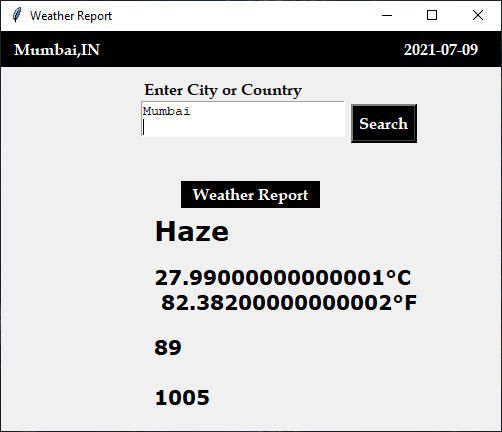

In [4]:
from IPython import display
display.Image('weatherReport.png')

### _3.	Create two browse button and place the .pdf file for the buttons and create a merge pdf option -  Watermark Merger App_

In [5]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
from PyPDF2 import PdfFileMerger, PdfFileReader
from pathlib import Path

filelist = []
merger = PdfFileMerger()

def open_file(files):
    filepath = askopenfilename(filetypes=[("PDF Files","*.pdf"), ("All Files", "*.*")])
    if not(filepath and Path(filepath).exists()):
        return
    files.append(filepath)
    # list out all filenames
    lbl_items["text"] = '\n'.join(str(f) for f in files)
    if len(files) >= 2 and btn_merge['state'] == "disabled":
        btn_merge["state"] = "normal"

def merge_pdfs(files):
    for f in files:
        merger.append(PdfFileReader(open(f, "rb")))
    
    output_filename = ent_output_name.get()

    if not output_filename:
        output_filename = "Untitled.pdf"
    elif ".pdf" not in output_filename:
        output_filename += ".pdf"
    merger.write(output_filename)


window = tk.Tk()
window.title("PDF Merger")
window.geometry("400x250")
window.resizable(0,0)


fr_bg1 = tk.Frame(window, bd=3)
lbl_open = tk.Label(fr_bg1, text="Choose PDFs to be Merged")
lbl_open.grid(row=0, column=0, sticky="ew", padx=5, pady=5)

btn_open = tk.Button(fr_bg1, text="Open file(s)",
                command=lambda: open_file(filelist))
btn_open.grid(row=1, column=0, sticky="ew", padx=5)
lbl_items = tk.Label(fr_bg1, text="")
lbl_items.grid(row=2, column=0, pady=5)
fr_bg1.pack()


fr_bg2 = tk.Frame(window, bd=3)
lbl_to_merge = tk.Label(fr_bg2, text="Enter Output Filename")
lbl_to_merge.grid(row=0, column=0, sticky="ew", padx="5", pady="5")

ent_output_name = tk.Entry(master=fr_bg2, width=7)
ent_output_name.grid(row=1, column=0, sticky="ew")

btn_merge = tk.Button(fr_bg2, 
                text="Merge PDF",
                state="disabled",
                command=lambda: merge_pdfs(filelist))
btn_merge.grid(row=2, column=0, sticky="ew", padx=5, pady=5)
fr_bg2.pack()

window.mainloop()

#### tkinter window:

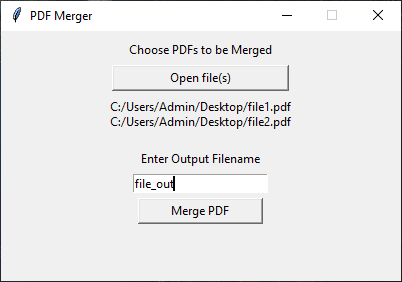

In [6]:
display.Image('pdfmerge.png')

---
## _Thank You!_